In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from IPython.display import display

In [2]:

URL_BASES = "/scratch2/haniel.botelho/eICU/"
patient = "patient.csv"
physicalExam = "physicalExam.csv"
lab = "lab.csv"
infusionDrug = "infusionDrug.csv"
diagnosis = "diagnosis.csv"

url_patient = URL_BASES + patient
url_physicalExam = URL_BASES + physicalExam
url_lab = URL_BASES + lab
url_infusionDrug = URL_BASES + infusionDrug
url_diagnosis = URL_BASES + diagnosis


In [3]:
df_patient = pd.read_csv(url_patient)

In [4]:
df_sepsis = df_patient[df_patient['apacheadmissiondx'].str.contains('sepsis', case=False, na=False)]

In [5]:
df_sepsis.count()

patientunitstayid            23136
patienthealthsystemstayid    23136
gender                       23131
age                          23136
ethnicity                    22931
hospitalid                   23136
wardid                       23136
apacheadmissiondx            23136
admissionheight              22900
hospitaladmittime24          23136
hospitaladmitoffset          23136
hospitaladmitsource          15981
hospitaldischargeyear        23136
hospitaldischargetime24      23136
hospitaldischargeoffset      23136
hospitaldischargelocation    22838
hospitaldischargestatus      22868
unittype                     23136
unitadmittime24              23136
unitadmitsource              23100
unitvisitnumber              23136
unitstaytype                 23136
admissionweight              22492
dischargeweight              13222
unitdischargetime24          23136
unitdischargeoffset          23136
unitdischargelocation        23107
unitdischargestatus          23132
uniquepid           

##### contagem

In [6]:
contagem_por_health_sepsis = df_sepsis.groupby(['uniquepid','patienthealthsystemstayid']).size().reset_index(name='Contagem_health_sepsis')
contagem_por_health_sepsis.sort_values(by='Contagem_health_sepsis',ascending=False).head()

,uniquepid,patienthealthsystemstayid,Contagem_health_sepsis
5063,006-28373,570538,5
5812,006-92708,625059,4
5744,006-88120,557301,4
8600,013-33039,1009398,4
10901,018-106918,1394663,4


In [7]:
contagem_por_patient_sepsis = df_sepsis.groupby(['uniquepid']).size().reset_index(name='Contagem_patient_sepsis')
contagem_por_patient_sepsis.sort_values(by='Contagem_patient_sepsis',ascending=False).head()

,uniquepid,Contagem_patient_sepsis
11179,018-63568,9
1479,003-37082,8
1732,003-8066,7
7845,013-29123,7
4028,006-203779,7


In [8]:
contagem = pd.merge(contagem_por_health_sepsis,contagem_por_patient_sepsis,on='uniquepid')
contagem.sort_values(by='Contagem_patient_sepsis',ascending=False).head(300000)

,uniquepid,patienthealthsystemstayid,Contagem_health_sepsis,Contagem_patient_sepsis
12308,018-63568,1374488,1,9
12307,018-63568,1348594,2,9
12311,018-63568,1422879,2,9
12310,018-63568,1403315,2,9
12309,018-63568,1389547,1,9
...,...,...,...,...
9982,016-35917,1214593,1,1
9983,016-36051,1217120,1,1
9984,016-36052,1228354,1,1
9985,016-36079,1213141,1,1


##### physical

In [9]:
df_physicalExam = pd.read_csv(url_physicalExam)

In [10]:
df_physicalExam_sepsis = pd.merge(df_sepsis['patientunitstayid'],df_physicalExam,on='patientunitstayid',how='left')

In [11]:
df_physicalExam.count()

physicalexamid        9212316
patientunitstayid     9212316
physicalexamoffset    9212316
physicalexampath      9212316
physicalexamvalue     9212316
physicalexamtext      9170989
dtype: int64

In [12]:
df_physicalExam_sepsis.count()

patientunitstayid     1329843
physicalexamid        1329535
physicalexamoffset    1329535
physicalexampath      1329535
physicalexamvalue     1329535
physicalexamtext      1322111
dtype: int64

In [13]:

def filter_exam(df, exam_name):
    return df[df['physicalexampath'].str.contains(exam_name, case=False, na=False)].copy()

In [19]:
def histograma(intervalo,range_, filtro):
    total_exam = []
    df_filtrado = filter_exam(df_physicalExam_sepsis,filtro)
    for i in range(range_):
        total_exam_dia = df_filtrado[(df_filtrado['physicalexamoffset']>=intervalo*i)&(df_filtrado['physicalexamoffset']<=intervalo*(i+1))].shape[0]
        total_exam.append(total_exam_dia)
    return total_exam

In [22]:
exames = ['O2 Sat%','HR','systolic','motor','verbal','eyes']
dados = []
for exam in exames:
    dados.append(histograma(60,24,exam))

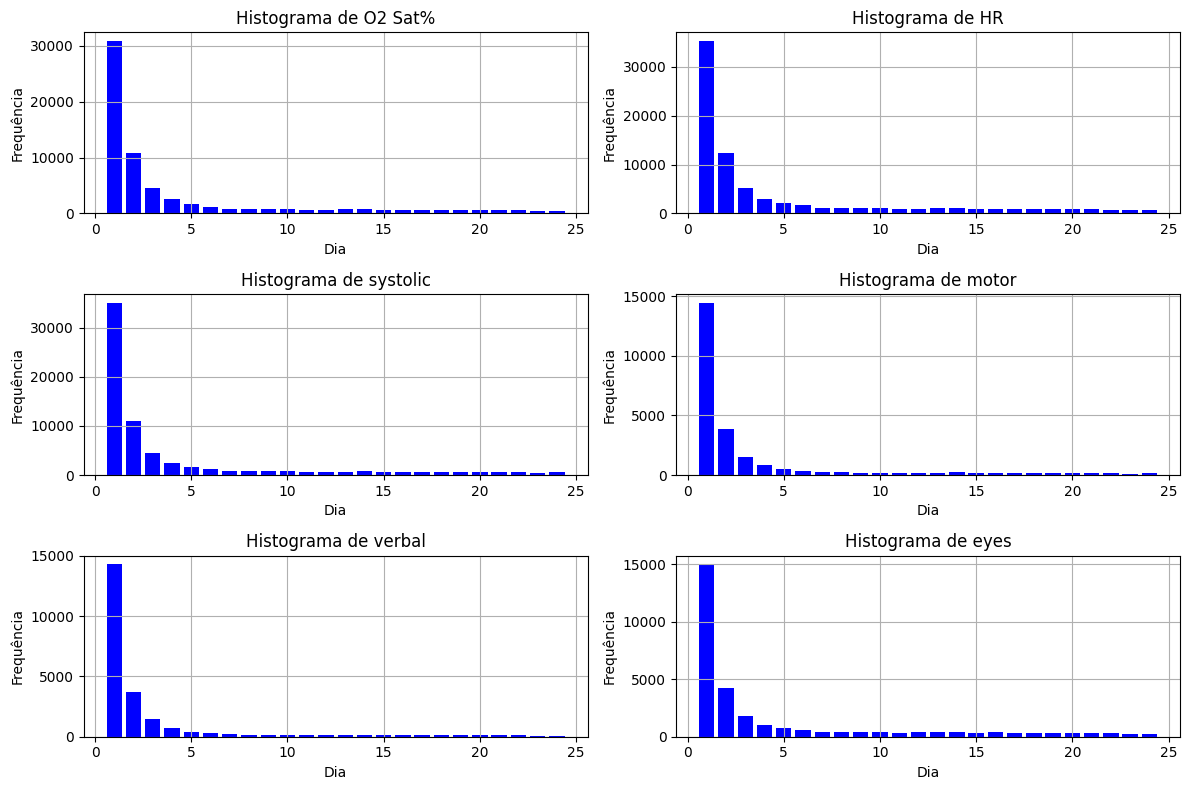

In [23]:
plt.figure(figsize=(12, 8))  # Definindo o tamanho da figura

for i, exam in enumerate(exames):
    plt.subplot(3, 2, i+1)  # Criando subplot para cada exame
    plt.bar(range(1, len(dados[i])+1), dados[i], color='blue')  # Plotando o histograma
    plt.title('Histograma de ' + exam)  # Adicionando um título ao gráfico
    plt.xlabel('Dia')  # Adicionando rótulo ao eixo x
    plt.ylabel('Frequência')  # Adicionando rótulo ao eixo y
    plt.grid(True)  # Adicionando grades ao gráfico

plt.tight_layout()  # Ajustando layout para evitar sobreposição
plt.show()  # Mostrando os gráficos

##### lab

##### infusion

##### diagnosis